# CLT & Hypothesis Testing

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

**Central Limit Theorem**

Central Limit Theorem claims that, no matter the shape of the population distribution, the average of a large number of samples will always be equal to the population mean.

In order to demonstrate the workings of the Central Limit Theorem, let's first create a population dataset. This simulated population will serve as a basis for later comparison with sampling distributions, showcasing how CLT facilitates accurate inferences even when only samples, rather than the entire population, are analyzed.

In [2]:
#Let's create a POPULATION of heights

heights = np.random.uniform(low=155, high=200, size=100000)

heights

array([180.73194212, 157.24861115, 180.12396391, ..., 190.76715597,
       178.73412081, 174.55674118])

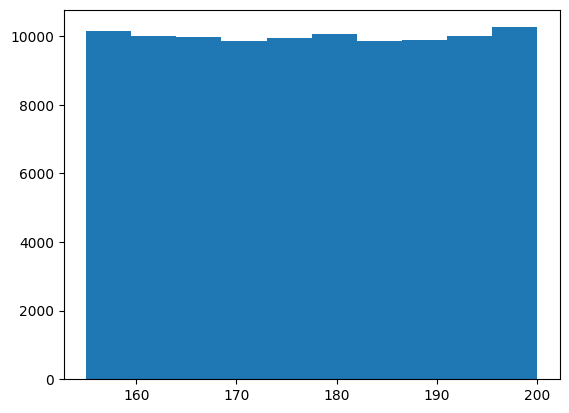

In [3]:
plt.hist(heights)
plt.show()

In [16]:
print(f"The population mean height is {heights.mean()}")

The population mean height is 177.44711040462127


Now lets take some samples from the population

In [4]:
#collecting 100 samples of 100 observations each
heights_samples = [np.mean(np.random.choice(heights, 100))for _ in range(100)]

Let's now plot the sampling distribution

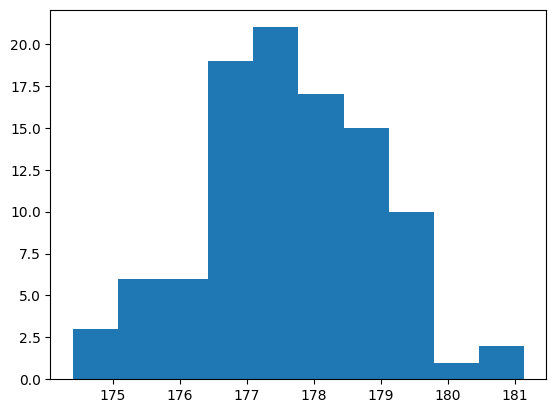

The mean of the sampling distribution is 177.65311906011706


In [5]:
plt.hist(heights_samples)
plt.show()
print(f"The mean of the sampling distribution is {np.mean(heights_samples)}")

As shown in this example, irrespectively of the shape of the population distribution, **the mean of the sampling distribution equals the population mean** and follows a normal distribution.

The standard deviation of the sampling distribution can also be manipulated (by increasing sample size) and we calculate it with the following expression:



![](https://github.com/data-bootcamp-v4/lessons/blob/main/img/std-samp-dist.png?raw=true)

This formula implies that if we have a bigger sample the standard deviation of the sampling distribution will decrease. Let's observe it with some examples

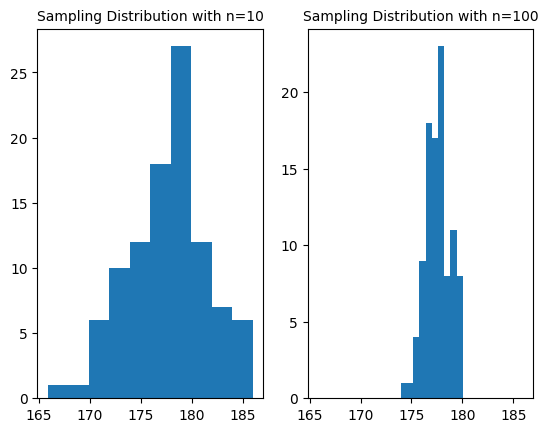

In [6]:
#Generate small samples
heights_samples_10 = [np.mean(np.random.choice(heights, 10))for _ in range(100)]

#Generate bigger samples
heights_samples_100 = [np.mean(np.random.choice(heights, 100))for _ in range(100)]

_, charts = plt.subplots(nrows = 1, ncols=2, sharex=True)
charts[0].set_title("Sampling Distribution with n=10", fontsize=10)
charts[0].hist(heights_samples_10)

charts[1].set_title("Sampling Distribution with n=100", fontsize=10)
charts[1].hist(heights_samples_100)
plt.show()

As shown in the sampling distributions plots above, larger samples sizes help us control **variation due to sample**.

# Hypothesis Testing

### One Sample T-test

In [7]:
#Load the data

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.shape

(891, 12)

**Let's check if 1st class ticket prices, traditionally thought to be $65, actually align with historical data through statistical testing.**

First we are breaking it down step by step

##### Set Hypothesis

In [9]:
#Set the hypothesis

#H0: mu 1st class_prices = 65
#H1: mu 1st class_prices!= 65

##### Choose significance level

In [8]:
alpha = 0.05

##### Collect data

In [9]:
first_class = df[df["Pclass"]==1]["Fare"]

##### Compute Test Statistic

In [10]:
#In order to calculate test statistic we need

#sample mean
mean = first_class.mean()

#standard deviation of sample
s = first_class.std(ddof=1)

#sample size
n = len(first_class)

#hypothesized population mean
mu = 65

stat = (mean - mu)/(s/np.sqrt(n))
stat # statistic 

np.float64(3.591655076885525)

##### Determine p_value

- In two-tailed test we can obtain the p_value using --> st.t.sf(abs(stat), n-1)*2

- In one-tailed test we can obtain the p_value using --> st.t.sf(abs(stat), n-1)

In [12]:
p_value = st.t.sf(abs(stat), n-1)*2
p_value

np.float64(0.00040720407722134215)

##### Decision-making

In [13]:
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")

We reject the null hypotesis


In this case because the p_value is lower our significance level, we can indeed reject the null hypothesis that claims 1st class tickets costs on average 60$.

**Python way**

In [14]:
st.ttest_1samp(first_class, 65)

# first param is the population. Second param is the hypothesized population mean (null hypothesis)

TtestResult(statistic=np.float64(3.591655076885525), pvalue=np.float64(0.00040720407722134215), df=np.int64(215))

**What if we believe that prices are more expensive than 65$ ?**

In [32]:
#Set hypothesis

#H0: mu 1st class_prices <= 65
#H1: mu 1st class_prices > 65

#with alpha = 0.05

In [15]:
st.ttest_1samp(first_class, 65, alternative = "greater")

# note that the p value is half of the previous calculation. 

TtestResult(statistic=np.float64(3.591655076885525), pvalue=np.float64(0.00020360203861067108), df=np.int64(215))

We also reject the null hypothesis that claimed 1st class prices on average equal or lower than 65.

We can say we obtained enough evidence to reject the null hypothesis

### Two Sample T-test

In [17]:
#Load the data - we are going to use titanic dataset

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We want to test if the average ticket price is the same for males and females

In [20]:
df_female = df[df["Sex"]=="female"]["Fare"]
df_male = df[df["Sex"]=="male"]["Fare"]

In [ ]:
#Set the hypothesis

#H0: mu_price male = mu_price female
#H1: mu_price male > mu_price female

#significance level = 0.05

In [21]:
st.ttest_ind(df_male,df_female, equal_var=False)

TtestResult(statistic=np.float64(-5.077499013458909), pvalue=np.float64(5.388057409693902e-07), df=np.float64(504.9643005334164))

In [23]:
st.ttest_ind(df_male,df_female, alternative="greater")

TtestResult(statistic=np.float64(-5.529140269385719), pvalue=np.float64(0.9999999788456606), df=np.float64(889.0))

In [22]:
st.ttest_ind(df_male,df_female, alternative="less")

TtestResult(statistic=np.float64(-5.529140269385719), pvalue=np.float64(2.1154339350214998e-08), df=np.float64(889.0))

Because p_value is lower than significance level, we reject the null hypothesis, this means that prices, on average, paid by males and females is indeed diferent

### Paired Sample T-test

We aim to assess the effectiveness of a medical drug in controlling blood pressure.

 We have obtained readings of individuals' blood pressure both before and after taking the drug

In [24]:
#Load data

df = pd.read_csv(r"https://raw.githubusercontent.com/data-bootcamp-v4/data/main/blood_pressure.csv")
df

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223
...,...,...
95,120.302824,85.128581
96,134.806478,106.925426
97,144.919839,83.105975
98,139.673854,87.560306


/var/folders/yf/ydfr37g56sb7b4mncpm76gk00000gn/T/ipykernel_50424/1030936440.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.dropna(), label = 'After', shade = True)


<Axes: ylabel='Density'>

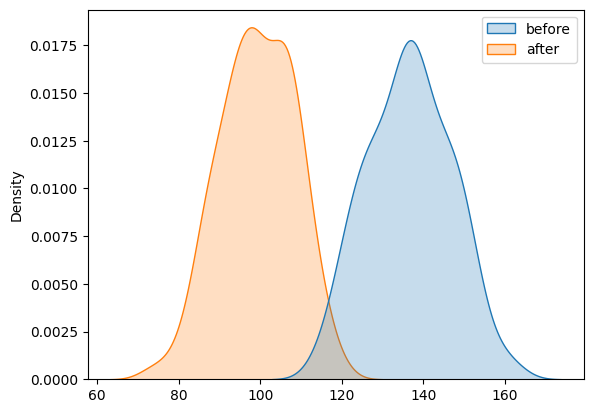

In [34]:
import seaborn as sns
sns.kdeplot(df.dropna(), label = 'After', shade = True)

In [11]:
#Set hypothesis

#H0: mu before = mu after
#H1: mu before != mu after

#Significance level -> 0.05
alpha = 0.05

In [38]:
_, p_value = st.ttest_rel(df["after"], df["before"])
p_value

np.float64(7.303035069607835e-48)

In [39]:
_, p_value = st.ttest_rel(df["after"], df["before"], alternative = "less") # vemos si after es menor que before. 
p_value

np.float64(3.6515175348039176e-48)

In [14]:
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


We reject the null hypothesis, therefore we can conclude the average blood pressure before and after taking the drug is not equal

### ANOVA

In [41]:
#Load the data

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/data_science_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,Mid,Contract,ML Engineer,30000,USD,30000,US,100,US,Small
2,2023,Mid,Contract,ML Engineer,25500,USD,25500,US,100,US,Small
3,2023,Senior,Full Time,Data Scientist,175000,USD,175000,CA,100,CA,Medium
4,2023,Senior,Full Time,Data Scientist,120000,USD,120000,CA,100,CA,Medium


Curious about salaries of data scientists, we're checking if company size will have an impact on people's salaries.

In order to procede with the test we must acknowledge that we have 3 differents groups

In [53]:
df["company_size"].unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [67]:
df_small = df[(df["company_size"]=="Small") & (df["job_title"]=="Data Scientist")]["salary_in_usd"]
df_medium = df[(df["company_size"]=="Medium") & (df["job_title"]=="Data Scientist")]["salary_in_usd"]
df_large = df[(df["company_size"]=="Large") & (df["job_title"]=="Data Scientist")]["salary_in_usd"]

In [68]:
#Set the hypothesis

#H0: mu df_small = mu df_medium = mu df_large
#H1: mu df_small != mu df_medium != mu df_large

#Lets choose significance level of 10%
alpha = 0.10

st.f_oneway(df_small, df_medium, df_large)

F_onewayResult(statistic=43.58231384585716, pvalue=1.0365759526494628e-18)

With such a small p_value, we once again, can reject the null hypothesis, therefore the company size will indeed have an impact of data scientists salary